In [1]:
import numpy as np
import pandas as pd

In [2]:
items_path = "../Datasets/items.csv"
q1_path = "../Datasets/quarter-1.csv"
q2_path = "../Datasets/quarter-2.csv"
q3_path = "../Datasets/quarter-3.csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

In [3]:
q2

order_id  quantity  item_id  choice_description_id item_price
0            1         1        0                      0     $2.39 
1            1         1        3                      0     $2.39 
2            3         1        4                      4    $10.98 
3            3         1        5                      0     $1.69 
4            4         1        6                      5    $11.75 
...        ...       ...      ...                    ...        ...
2342      1829         1       23                     92    $11.25 
2343      1830         1       23                   1043    $11.25 
2344      1832         1       10                    116     $8.75 
2345      1832         1        8                      0     $4.45 
2346      1834         1       20                    515    $11.25 

[2347 rows x 5 columns]

In [4]:
q1.tail()

order_id  quantity  item_id  choice_description_id item_price
2270      1831         1       16                      0     $1.50 
2271      1833         1        6                    276    $11.75 
2272      1833         1        6                    904    $11.75 
2273      1834         1       20                    303     $8.75 
2274      1834         1       20                     30     $8.75

In [10]:
q = pd.concat([q1,q2,q3], keys=['Q1', 'Q2', 'Q3'], ignore_index=False).reset_index()
q

level_0  level_1 order_id quantity item_id choice_description_id  \
0         Q1        0        1        1       1                     1   
1         Q1        1        1        1       2                     2   
2         Q1        2        2        2       4                     3   
3         Q1        3        4        1       7                     6   
4         Q1        4        6        1       9                     8   
...      ...      ...      ...      ...     ...                   ...   
4617      Q2     2342     1829        1      23                    92   
4618      Q2     2343     1830        1      23                  1043   
4619      Q2     2344     1832        1      10                   116   
4620      Q2     2345     1832        1       8                     0   
4621      Q2     2346     1834        1      20                   515   

     item_price  
0        $3.39   
1        $3.39   
2       $16.98   
3        $9.25   
4        $8.75   
...         ...  
4617    $11.25   
4618    $11.25   
4619     $8.75   
4620     $4.45   
4621    $11.25   

[4622 rows x 7 columns]

In [127]:
merged_items = q.merge(items, on="item_id")

merged_items

level_0  level_1 order_id quantity item_id choice_description_id  \
0         Q1        0        1        1       1                     1   
1         Q1       10       12        1       1                    18   
2         Q1       25       21        1       1                    33   
3         Q1       34       30        1       1                    33   
4         Q1      179      155        1       1                    33   
...      ...      ...      ...      ...     ...                   ...   
4617      Q2     1411     1094        1      48                   755   
4618      Q2     1528     1192        1      48                   149   
4619      Q2     1605     1263        1      48                   306   
4620      Q2     1745     1395        1      48                   755   
4621      Q2      826      668        1      47                   217   

     item_price            item_name  
0        $3.39                  Izze  
1        $3.39                  Izze  
2        $3.39                  Izze  
3        $3.39                  Izze  
4        $3.39                  Izze  
...         ...                  ...  
4617     $8.49          Veggie Salad  
4618     $8.49          Veggie Salad  
4619     $8.49          Veggie Salad  
4620     $8.49          Veggie Salad  
4621     $8.49   Veggie Crispy Tacos  

[4622 rows x 8 columns]

In [128]:
result = merged_items.groupby(['level_0','item_name'], as_index=False)['quantity'].sum().sort_values("quantity", ascending=False).drop_duplicates(subset="level_0",keep="first")
result

level_0     item_name quantity
65      Q2  Chicken Bowl      394
17      Q1  Chicken Bowl      367

In [129]:
merged_items

level_0  level_1 order_id quantity item_id choice_description_id  \
0         Q1        0        1        1       1                     1   
1         Q1       10       12        1       1                    18   
2         Q1       25       21        1       1                    33   
3         Q1       34       30        1       1                    33   
4         Q1      179      155        1       1                    33   
...      ...      ...      ...      ...     ...                   ...   
4617      Q2     1411     1094        1      48                   755   
4618      Q2     1528     1192        1      48                   149   
4619      Q2     1605     1263        1      48                   306   
4620      Q2     1745     1395        1      48                   755   
4621      Q2      826      668        1      47                   217   

     item_price            item_name  
0        $3.39                  Izze  
1        $3.39                  Izze  
2        $3.39                  Izze  
3        $3.39                  Izze  
4        $3.39                  Izze  
...         ...                  ...  
4617     $8.49          Veggie Salad  
4618     $8.49          Veggie Salad  
4619     $8.49          Veggie Salad  
4620     $8.49          Veggie Salad  
4621     $8.49   Veggie Crispy Tacos  

[4622 rows x 8 columns]

In [130]:
merged_items['item_price'] = merged_items['item_price'].apply(lambda x: float(x[1:]) * 87 )

In [131]:
merged_items

level_0  level_1 order_id quantity item_id choice_description_id  \
0         Q1        0        1        1       1                     1   
1         Q1       10       12        1       1                    18   
2         Q1       25       21        1       1                    33   
3         Q1       34       30        1       1                    33   
4         Q1      179      155        1       1                    33   
...      ...      ...      ...      ...     ...                   ...   
4617      Q2     1411     1094        1      48                   755   
4618      Q2     1528     1192        1      48                   149   
4619      Q2     1605     1263        1      48                   306   
4620      Q2     1745     1395        1      48                   755   
4621      Q2      826      668        1      47                   217   

      item_price            item_name  
0         294.93                 Izze  
1         294.93                 Izze  
2         294.93                 Izze  
3         294.93                 Izze  
4         294.93                 Izze  
...          ...                  ...  
4617      738.63         Veggie Salad  
4618      738.63         Veggie Salad  
4619      738.63         Veggie Salad  
4620      738.63         Veggie Salad  
4621      738.63  Veggie Crispy Tacos  

[4622 rows x 8 columns]

In [132]:
merged_items['total_price'] = merged_items['item_price'] * (merged_items['quantity'].apply(lambda x : float(x)))

In [133]:
merged_items.sample(5)

level_0  level_1 order_id quantity item_id choice_description_id  \
2697      Q1     1205      979        1       6                   681   
1468      Q2     1753     1402        1      11                   328   
662       Q2     1705     1359        1       4                    91   
1796      Q2       56       48        1       8                     0   
3654      Q1     1412     1146        1      14                   780   

      item_price            item_name  total_price  
2697      804.75        Steak Burrito       804.75  
1468      761.25      Chicken Burrito       761.25  
662       761.25         Chicken Bowl       761.25  
1796      387.15  Chips and Guacamole       387.15  
3654      963.96     Carnitas Burrito       963.96

In [134]:
merged_items.groupby(['level_0','item_name'], as_index=False)['total_price'].sum().sort_values("total_price",ascending=False).drop_duplicates(subset="level_0", keep="first")

level_0     item_name  total_price
65      Q2  Chicken Bowl    364725.75
17      Q1  Chicken Bowl    335157.06

In [141]:
merged_items.groupby(['level_0'], as_index=False)['total_price'].mean().sort_values("total_price",ascending=False).drop_duplicates(subset="level_0", keep="first")

level_0  total_price
0      Q1   763.103196
1      Q2   714.768202

In [142]:
merged_items


level_0  level_1 order_id quantity item_id choice_description_id  \
0         Q1        0        1        1       1                     1   
1         Q1       10       12        1       1                    18   
2         Q1       25       21        1       1                    33   
3         Q1       34       30        1       1                    33   
4         Q1      179      155        1       1                    33   
...      ...      ...      ...      ...     ...                   ...   
4617      Q2     1411     1094        1      48                   755   
4618      Q2     1528     1192        1      48                   149   
4619      Q2     1605     1263        1      48                   306   
4620      Q2     1745     1395        1      48                   755   
4621      Q2      826      668        1      47                   217   

      item_price            item_name  total_price  
0         294.93                 Izze       294.93  
1         294.93                 Izze       294.93  
2         294.93                 Izze       294.93  
3         294.93                 Izze       294.93  
4         294.93                 Izze       294.93  
...          ...                  ...          ...  
4617      738.63         Veggie Salad       738.63  
4618      738.63         Veggie Salad       738.63  
4619      738.63         Veggie Salad       738.63  
4620      738.63         Veggie Salad       738.63  
4621      738.63  Veggie Crispy Tacos       738.63  

[4622 rows x 9 columns]

In [149]:
merged_items.groupby("level_0")['total_price'].sum()

level_0
Q1    1736059.77
Q2    1677560.97
Name: total_price, dtype: float64

In [148]:
merged_items.groupby("level_0").count()

level_1  order_id  quantity  item_id  choice_description_id  \
level_0                                                                
Q1          2275      2275      2275     2275                   2275   
Q2          2347      2347      2347     2347                   2347   

         item_price  item_name  total_price  
level_0                                      
Q1             2275       2275         2275  
Q2             2347       2347         2347

In [10]:
a = pd.Series([])
a

Series([], dtype: object)

In [11]:
a.size

0

In [12]:
a.empty

True

In [19]:
a = pd.Series([1,2,3,4,5])
b = pd.Series([5,6,7,8,9])

a / b

0    0.200000
1    0.333333
2    0.428571
3    0.500000
4    0.555556
dtype: float64

In [20]:
a + b

0     6
1     8
2    10
3    12
4    14
dtype: int64

In [21]:
a - b

0   -4
1   -4
2   -4
3   -4
4   -4
dtype: int64

In [22]:
a * b

0     5
1    12
2    21
3    32
4    45
dtype: int64

In [302]:
a = pd.Series( [2, 4, 6, 8, 10])
b = pd.Series( [1, 3, 5, 7, 10])

print(a == b)
print(a > b)
print(a < b)

0    False
1    False
2    False
3    False
4     True
dtype: bool
0     True
1     True
2     True
3     True
4    False
dtype: bool
0    False
1    False
2    False
3    False
4    False
dtype: bool


In [44]:
def changeSeries(series, dt):
    print(pd.to_numeric(series, errors='coerce').astype('float')  )
    

In [45]:
series = pd.Series([1,2,'Python', 2.0, True, 100])
changeSeries(series, float)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64


In [303]:
data = pd.read_csv("./batsman_runs_series.csv")
a = data['batter'].squeeze()
b = data['batsman_run'].squeeze()
c = pd.Series(b.values, index=a)
c

batter
A Ashish Reddy     280
A Badoni           161
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yash Dayal           0
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2754
Z Khan             117
Length: 605, dtype: int64

In [304]:
data

batter  batsman_run
0    A Ashish Reddy          280
1          A Badoni          161
2        A Chandila            4
3          A Chopra           53
4       A Choudhary           25
..              ...          ...
600      Yash Dayal            0
601   Yashpal Singh           47
602     Younis Khan            3
603    Yuvraj Singh         2754
604          Z Khan          117

[605 rows x 2 columns]

In [309]:
data.sort_values('batsman_run', ascending=False).head(10)

batter  batsman_run
569         V Kohli         6634
462        S Dhawan         6244
130       DA Warner         5883
430       RG Sharma         5881
493        SK Raina         5536
27   AB de Villiers         5181
108        CH Gayle         4997
339        MS Dhoni         4978
452      RV Uthappa         4954
256      KD Karthik         4377

In [171]:
c = c.groupby(level=0).sum().sort_values(ascending=False)
d = c.head(10)
d

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
dtype: int64

In [312]:
c[c > 3000].size

20

In [311]:
c.mean()

464.42809917355373

In [317]:
c[c > c.mean()].size

128

In [332]:
data = pd.read_csv("./items.csv", index_col=["item_name"]).squeeze('columns')
data

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [333]:
data.size - data.count()

50

In [334]:
data.isnull().sum()

50

In [335]:
data.isna().sum()

50

In [340]:
def rupees(x):
    try:
        y = x[1:]
    except:
        y = x
    return float(y) * 87

res = data.apply(rupees)
res.fillna(res.mean())

item_name
Chips and Fresh Tomato Salsa              207.93
Izze                                      294.93
Nantucket Nectar                          294.93
Chips and Tomatillo-Green Chili Salsa     207.93
Chicken Bowl                             1477.26
                                          ...   
Steak Burrito                            1022.25
Steak Burrito                            1022.25
Chicken Salad Bowl                        978.75
Chicken Salad Bowl                        761.25
Chicken Salad Bowl                        761.25
Name: item_price, Length: 4622, dtype: float64

In [341]:
res.mean()

649.2837401574803

In [343]:
res.quantile(q=0.3)

387.15000000000003

In [344]:
res.quantile(q=0.06)

108.75

<AxesSubplot: ylabel='Frequency'>

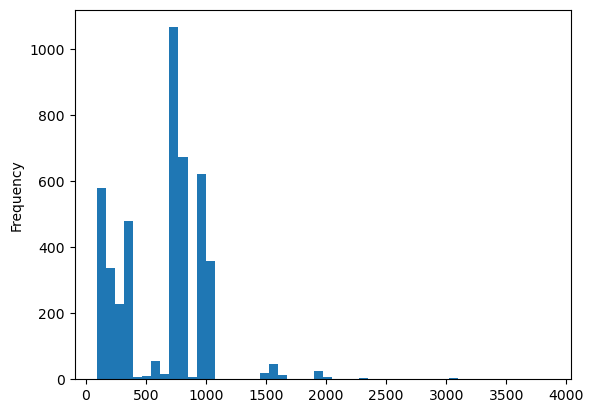

In [347]:
res.plot(kind="hist", bins=50)

In [350]:
res[res.between(1000,2000)].size

419

In [358]:
res[(res >= 1000 ) & (res <= 2000)].shape[0]

419

In [359]:
res[(res >= 1000 ) & (res <= 2000)].size

419

In [457]:
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'], 
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2], 
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

In [458]:
data

{'birds': ['Cranes',
  'Cranes',
  'plovers',
  'spoonbills',
  'spoonbills',
  'Cranes',
  'plovers',
  'Cranes',
  'spoonbills',
  'spoonbills',
  'Cranes'],
 'age': [3.5, 4, 1.5, nan, 6, 3, 5.5, nan, 8, 4, 3.5],
 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
 'priority': ['yes',
  'yes',
  'no',
  nan,
  'no',
  'no',
  'no',
  'yes',
  'no',
  'no',
  'yes']}

In [471]:
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
labels

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

In [530]:
df = pd.DataFrame(data, labels)
# birds = df.rename(columns={0:"Birds"})
birds

birds  age  visits priority
a      Cranes  3.5       2      yes
b      Cranes  4.0       4      yes
c     plovers  1.5       3       no
d  spoonbills  NaN       4      NaN
e  spoonbills  6.0       3       no
f      Cranes  3.0       4       no
g     plovers  5.5       2       no
h      Cranes  NaN       2      yes
i  spoonbills  8.0       3       no
j  spoonbills  4.0       2       no
k      Cranes  3.5       2      yes

In [473]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


In [525]:
df.describe()

ID      Margin
count  9.500000e+02  932.000000
mean   8.304852e+05   17.056867
std    3.375678e+05   21.633109
min    3.359820e+05    1.000000
25%    5.012612e+05    6.000000
50%    8.297380e+05    8.000000
75%    1.175372e+06   19.000000
max    1.312200e+06  146.000000

In [474]:
birds.loc['a':'k':2]

birds  age  visits priority
a      Cranes  3.5       2      yes
c     plovers  1.5       3       no
e  spoonbills  6.0       3       no
g     plovers  5.5       2       no
i  spoonbills  8.0       3       no
k      Cranes  3.5       2      yes

In [528]:
birds.iloc[::2,:]

birds  age  visits priority
a      Cranes  3.5       2      yes
c     plovers  1.5       3       no
e  spoonbills  6.0       3       no
g     plovers  5.5       2       no
i  spoonbills  8.0       3       no
k      Cranes  3.5       2      yes

In [475]:
birds

birds  age  visits priority
a      Cranes  3.5       2      yes
b      Cranes  4.0       4      yes
c     plovers  1.5       3       no
d  spoonbills  NaN       4      NaN
e  spoonbills  6.0       3       no
f      Cranes  3.0       4       no
g     plovers  5.5       2       no
h      Cranes  NaN       2      yes
i  spoonbills  8.0       3       no
j  spoonbills  4.0       2       no
k      Cranes  3.5       2      yes

In [476]:
birds.iloc[[0,2,6]][['birds','age']]

birds  age
a   Cranes  3.5
c  plovers  1.5
g  plovers  5.5

In [477]:
birds[birds['visits'] < 4]

birds  age  visits priority
a      Cranes  3.5       2      yes
c     plovers  1.5       3       no
e  spoonbills  6.0       3       no
g     plovers  5.5       2       no
h      Cranes  NaN       2      yes
i  spoonbills  8.0       3       no
j  spoonbills  4.0       2       no
k      Cranes  3.5       2      yes

In [478]:
birds

birds  age  visits priority
a      Cranes  3.5       2      yes
b      Cranes  4.0       4      yes
c     plovers  1.5       3       no
d  spoonbills  NaN       4      NaN
e  spoonbills  6.0       3       no
f      Cranes  3.0       4       no
g     plovers  5.5       2       no
h      Cranes  NaN       2      yes
i  spoonbills  8.0       3       no
j  spoonbills  4.0       2       no
k      Cranes  3.5       2      yes

In [480]:
birds[(birds['age'].isnull()) | (birds['visits'].isnull())]

birds  age  visits priority
d  spoonbills  NaN       4      NaN
h      Cranes  NaN       2      yes

In [531]:
birds

birds  age  visits priority
a      Cranes  3.5       2      yes
b      Cranes  4.0       4      yes
c     plovers  1.5       3       no
d  spoonbills  NaN       4      NaN
e  spoonbills  6.0       3       no
f      Cranes  3.0       4       no
g     plovers  5.5       2       no
h      Cranes  NaN       2      yes
i  spoonbills  8.0       3       no
j  spoonbills  4.0       2       no
k      Cranes  3.5       2      yes

In [532]:
birds['age'].mode()

0    3.5
1    4.0
Name: age, dtype: float64

In [533]:
birds['age'].fillna(birds['age'].mode()[0])

a    3.5
b    4.0
c    1.5
d    3.5
e    6.0
f    3.0
g    5.5
h    3.5
i    8.0
j    4.0
k    3.5
Name: age, dtype: float64

In [534]:
birds['visits'].fillna(birds['visits'].mode()[0])

a    2
b    4
c    3
d    4
e    3
f    4
g    2
h    2
i    3
j    2
k    2
Name: visits, dtype: int64

In [535]:
birds['priority'].fillna(birds['priority'].mode()[0])

a    yes
b    yes
c     no
d     no
e     no
f     no
g     no
h    yes
i     no
j     no
k    yes
Name: priority, dtype: object

In [486]:
birds[birds['birds'] == 'Cranes']['visits'].sum()

14

In [487]:
birds

birds  age  visits priority
a      Cranes  3.5       2      yes
b      Cranes  4.0       4      yes
c     plovers  1.5       3       no
d  spoonbills  NaN       4      NaN
e  spoonbills  6.0       3       no
f      Cranes  3.0       4       no
g     plovers  5.5       2       no
h      Cranes  NaN       2      yes
i  spoonbills  8.0       3       no
j  spoonbills  4.0       2       no
k      Cranes  3.5       2      yes

In [541]:
birds.duplicated().sum()

1

In [500]:
birds[~birds['birds'].duplicated()].shape[0]

3

In [506]:
birds[birds['birds'].duplicated()].shape[0]

8

In [537]:
birds['birds'].value_counts()

birds
Cranes        5
spoonbills    4
plovers       2
Name: count, dtype: int64

In [548]:
birds.drop_duplicates(inplace=True)

In [6]:
df = pd.read_csv('./IPL_Matches_2008_2022.csv')
df.head(2)

ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   

                         Team1             Team2  \
0             Rajasthan Royals    Gujarat Titans   
1  Royal Challengers Bangalore  Rajasthan Royals   

                              Venue        TossWinner TossDecision SuperOver  \
0  Narendra Modi Stadium, Ahmedabad  Rajasthan Royals          bat         N   
1  Narendra Modi Stadium, Ahmedabad  Rajasthan Royals        field         N   

        WinningTeam    WonBy  Margin method Player_of_Match  \
0    Gujarat Titans  Wickets     7.0    NaN       HH Pandya   
1  Rajasthan Royals  Wickets     7.0    NaN      JC Buttler   

                                        Team1Players  \
0  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   

                                        Team2Players      Umpire1      Umpire2  
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...  CB Gaffaney  Nitin Menon  
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...  CB Gaffaney  Nitin Menon

In [7]:
new_teams = {'Delhi Capitals': 'Delhi Daredevils', 'Punjab Kings':'Kings XI Punjab', 'Rising Pune Supergiant': 'Rising Pune Supergiants'}

In [8]:
df.replace(new_teams.keys(), new_teams.values(), inplace=True)
df

ID        City        Date   Season  MatchNumber  \
0    1312200   Ahmedabad  2022-05-29     2022        Final   
1    1312199   Ahmedabad  2022-05-27     2022  Qualifier 2   
2    1312198     Kolkata  2022-05-25     2022   Eliminator   
3    1312197     Kolkata  2022-05-24     2022  Qualifier 1   
4    1304116      Mumbai  2022-05-22     2022           70   
..       ...         ...         ...      ...          ...   
945   335986     Kolkata  2008-04-20  2007/08            4   
946   335985      Mumbai  2008-04-20  2007/08            5   
947   335984       Delhi  2008-04-19  2007/08            3   
948   335983  Chandigarh  2008-04-19  2007/08            2   
949   335982   Bangalore  2008-04-18  2007/08            1   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Titans   
1    Royal Challengers Bangalore             Rajasthan Royals   
2    Royal Challengers Bangalore         Lucknow Super Giants   
3               Rajasthan Royals               Gujarat Titans   
4            Sunrisers Hyderabad              Kings XI Punjab   
..                           ...                          ...   
945        Kolkata Knight Riders              Deccan Chargers   
946               Mumbai Indians  Royal Challengers Bangalore   
947             Delhi Daredevils             Rajasthan Royals   
948              Kings XI Punjab          Chennai Super Kings   
949  Royal Challengers Bangalore        Kolkata Knight Riders   

                                          Venue                   TossWinner  \
0              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
1              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
2                         Eden Gardens, Kolkata         Lucknow Super Giants   
3                         Eden Gardens, Kolkata               Gujarat Titans   
4                      Wankhede Stadium, Mumbai          Sunrisers Hyderabad   
..                                          ...                          ...   
945                                Eden Gardens              Deccan Chargers   
946                            Wankhede Stadium               Mumbai Indians   
947                            Feroz Shah Kotla             Rajasthan Royals   
948  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
949                       M Chinnaswamy Stadium  Royal Challengers Bangalore   

    TossDecision SuperOver                  WinningTeam    WonBy  Margin  \
0            bat         N               Gujarat Titans  Wickets     7.0   
1          field         N             Rajasthan Royals  Wickets     7.0   
2          field         N  Royal Challengers Bangalore     Runs    14.0   
3          field         N               Gujarat Titans  Wickets     7.0   
4            bat         N              Kings XI Punjab  Wickets     5.0   
..           ...       ...                          ...      ...     ...   
945          bat         N        Kolkata Knight Riders  Wickets     5.0   
946          bat         N  Royal Challengers Bangalore  Wickets     5.0   
947          bat         N             Delhi Daredevils  Wickets     9.0   
948          bat         N          Chennai Super Kings     Runs    33.0   
949        field         N        Kolkata Knight Riders     Runs   140.0   

    method Player_of_Match                                       Team1Players  \
0      NaN       HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1      NaN      JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2      NaN      RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3      NaN       DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4      NaN   Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   
..     ...             ...                                                ...   
945    NaN       DJ Hussey  ['WP Saha', 'BB

In [9]:
top10= (df['Team1'].value_counts() + df['Team2'].value_counts()).sort_values(ascending=False).head(5)

<AxesSubplot: >

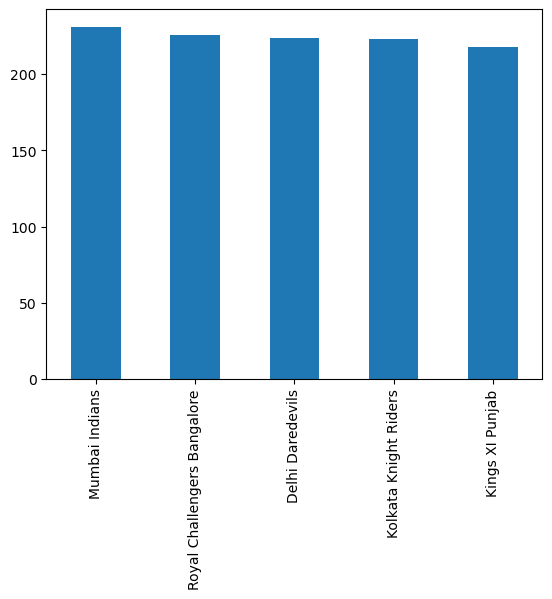

In [10]:
top10.plot(kind="bar")

In [11]:
df

ID        City        Date   Season  MatchNumber  \
0    1312200   Ahmedabad  2022-05-29     2022        Final   
1    1312199   Ahmedabad  2022-05-27     2022  Qualifier 2   
2    1312198     Kolkata  2022-05-25     2022   Eliminator   
3    1312197     Kolkata  2022-05-24     2022  Qualifier 1   
4    1304116      Mumbai  2022-05-22     2022           70   
..       ...         ...         ...      ...          ...   
945   335986     Kolkata  2008-04-20  2007/08            4   
946   335985      Mumbai  2008-04-20  2007/08            5   
947   335984       Delhi  2008-04-19  2007/08            3   
948   335983  Chandigarh  2008-04-19  2007/08            2   
949   335982   Bangalore  2008-04-18  2007/08            1   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Titans   
1    Royal Challengers Bangalore             Rajasthan Royals   
2    Royal Challengers Bangalore         Lucknow Super Giants   
3               Rajasthan Royals               Gujarat Titans   
4            Sunrisers Hyderabad              Kings XI Punjab   
..                           ...                          ...   
945        Kolkata Knight Riders              Deccan Chargers   
946               Mumbai Indians  Royal Challengers Bangalore   
947             Delhi Daredevils             Rajasthan Royals   
948              Kings XI Punjab          Chennai Super Kings   
949  Royal Challengers Bangalore        Kolkata Knight Riders   

                                          Venue                   TossWinner  \
0              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
1              Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
2                         Eden Gardens, Kolkata         Lucknow Super Giants   
3                         Eden Gardens, Kolkata               Gujarat Titans   
4                      Wankhede Stadium, Mumbai          Sunrisers Hyderabad   
..                                          ...                          ...   
945                                Eden Gardens              Deccan Chargers   
946                            Wankhede Stadium               Mumbai Indians   
947                            Feroz Shah Kotla             Rajasthan Royals   
948  Punjab Cricket Association Stadium, Mohali          Chennai Super Kings   
949                       M Chinnaswamy Stadium  Royal Challengers Bangalore   

    TossDecision SuperOver                  WinningTeam    WonBy  Margin  \
0            bat         N               Gujarat Titans  Wickets     7.0   
1          field         N             Rajasthan Royals  Wickets     7.0   
2          field         N  Royal Challengers Bangalore     Runs    14.0   
3          field         N               Gujarat Titans  Wickets     7.0   
4            bat         N              Kings XI Punjab  Wickets     5.0   
..           ...       ...                          ...      ...     ...   
945          bat         N        Kolkata Knight Riders  Wickets     5.0   
946          bat         N  Royal Challengers Bangalore  Wickets     5.0   
947          bat         N             Delhi Daredevils  Wickets     9.0   
948          bat         N          Chennai Super Kings     Runs    33.0   
949        field         N        Kolkata Knight Riders     Runs   140.0   

    method Player_of_Match                                       Team1Players  \
0      NaN       HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1      NaN      JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2      NaN      RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3      NaN       DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4      NaN   Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   
..     ...             ...                                                ...   
945    NaN       DJ Hussey  ['WP Saha', 'BB

In [12]:
c1 = (df['Team1'] == "Mumbai Indians") | (df['Team2'] == "Mumbai Indians")
c2 = (df['WinningTeam'] != "Mumbai Indians")

df[c1 & c2]['Player_of_Match'].value_counts(ascending=False).head(1)

Player_of_Match
SPD Smith    4
Name: count, dtype: int64

In [13]:
def team1_vs_team2(t1,t2):
    c1 = (df['Team1'] == t1) | (df['Team2'] == t1)
    c2 = (df['Team1'] == t2) | (df['Team2'] == t2)
    
    df1 = df[c1 & c2]
    print(df1['Player_of_Match'].value_counts(ascending=False).head(1))
    return df1['WinningTeam'].value_counts()


res = team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
print(res)

Player_of_Match
RA Jadeja    3
Name: count, dtype: int64
WinningTeam
Chennai Super Kings      17
Kolkata Knight Riders     9
Name: count, dtype: int64


In [14]:
c1 = (df['Team1'] == "Kolkata Knight Riders") | (df['Team2'] == "Kolkata Knight Riders")

<AxesSubplot: ylabel='count'>

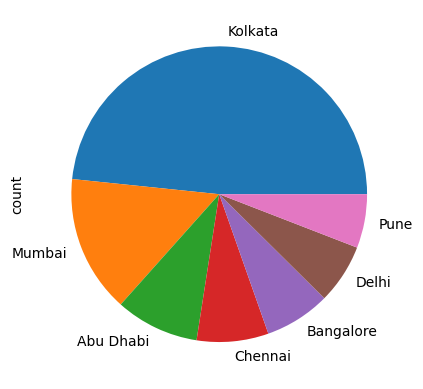

In [17]:
df[c1]['City'].value_counts(ascending=False).head(7).plot(kind = "pie")

In [610]:
c1 = (df['Team1'] == "Mumbai Indians") | (df['Team2'] == "Mumbai Indians")
c2 = df['Season'] = 2011
df[c1 & c2].Margin.mean()

18.24669603524229

In [1]:
import pandas as pd
import numpy as np
s = pd.Series(np.random.randn(2))
print(s.size)

2


In [3]:
import pandas as pd
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
print(s['a'])

1


In [18]:
x = np.array([[1,2,3],[4,5,6]])
print(x)
print(x.shape)
print("Swapped")
x_swapped = np.swapaxes(x,0,1)
print(x_swapped)
print(x_swapped.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)
Swapped
[[1 4]
 [2 5]
 [3 6]]
(3, 2)


In [19]:
x.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [18]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [100]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT3D_x_4DS6d51LKJ7ze1sxT5WpV5uiSVOFYHLwBiGru6vFyVv5h5-83AwFjxWYiWfCDjDAaarHAV-k/pub?gid=0&single=true&output=csv"
df = pd.read_csv(url)
df.head()

Sl. No  Match No.     Team      Against Group  Goal  Possession (%)  \
0       1          1    Qatar      Ecuador     A     0              40   
1       2          1  Ecuador        Qatar     A     2              46   
2       3          2  England         Iran     B     6              69   
3       4          2     Iran      England     B     2              20   
4       5          3  Senegal  Netherlands     A     0              39   

   Inside Penalty Area  Outside Penalty Area  Assists  Total Attempts  \
0                    0                     0        0               5   
1                    2                     0        1               5   
2                    6                     0        6              13   
3                    2                     0        1               8   
4                    0                     0        0              15   

   On Target  Off Target  Target in Penalty  Target from Outside  \
0          0           5                  2                    3   
1          5           2                  4                    1   
2          7           3                 10                    3   
3          3           4                  6                    2   
4          4           7                  8                    7   

   Left Channel  Left Inside Channel  Central Channel  Right Inside Channel  \
0            15                    0                3                     1   
1             8                    7                6                     4   
2            11                    5                2                     3   
3             3                    0                3                     1   
4            12                    4                2                     4   

   Right Channel  Receptions MD  Receptions D  Attempted Line Breaks  \
0              9             45             5                    159   
1              6             55            10                    159   
2             11             72            15                    133   
3              1             34             1                     56   
4             13            101            12                    143   

   Completed Line Breaks  Attempted Defensive Line Breaks  \
0                    100                                6   
1                    103                                6   
2                     94                                8   
3                     19                                1   
4                     86                                6   

   Completed Defensive Line Breaks  Yellow Cards  Red Cards  Fouls Against  \
0                                4             4          0             15   
1                                4             2          0             15   
2                                6             0          0              9   
3                                1             2          0             14   
4                                6             2          0             13   

   Offsides  Passes  Passes Completed  Crosses  Crosses Completed  Corners  \
0         3     453               387       10                  5        1   
1         4     484               419       26                 10        3   
2         2     810               733       29                  9        8   
3         2     232               156       11                  3        0   
4         2     391               326       22                  8        6   

   Free Kicks  Penalties Scored  Pts  
0          19                 0    0  
1          17                 1    3  
2          16                 0    3  
3          10                 1    0  
4          14                 0    0

In [71]:
unique_teams = df['Team'].unique()
res = dict()
for x in unique_teams:
    total_attempts_sum = df[df['Team'] == x]['Total Attempts'].sum()
    total_on_target_sum = df[df['Team'] == x]['On Target'].sum()
    percentage =  (total_on_target_sum / total_attempts_sum) * 100
    res[x] = round(percentage,2)
    
    
opt = sorted(res.items(), key = lambda x: x[1], reverse=True)
dict(opt)

{'Costa Rica': 54.55,
 'Cameroon': 51.85,
 'Ecuador': 48.15,
 'Argentina': 46.15,
 'Brazil': 45.56,
 'England': 45.0,
 'Portugal': 40.32,
 'Ghana': 40.0,
 'Netherlands': 39.02,
 'Korea Republic': 36.73,
 'Australia': 36.0,
 'Mexico': 34.88,
 'France': 34.65,
 'Germany': 34.33,
 'Croatia': 33.73,
 'Spain': 32.69,
 'Belgium': 32.35,
 'Serbia': 32.26,
 'Iran': 31.43,
 'Uruguay': 31.25,
 'United States': 31.11,
 'Saudi Arabia': 31.03,
 'Senegal': 30.77,
 'Denmark': 30.56,
 'Switzerland': 30.56,
 'Japan': 30.23,
 'Wales': 29.17,
 'Qatar': 28.57,
 'Morocco': 28.33,
 'Tunisia': 26.67,
 'Poland': 25.0,
 'Canada': 17.65}

In [76]:
df['Team'].value_counts().rank(method="first")

Team
Morocco           29.0
Croatia           30.0
Argentina         31.0
France            32.0
England           25.0
Brazil            26.0
Netherlands       27.0
Portugal          28.0
Poland            17.0
Japan             18.0
Switzerland       19.0
Australia         20.0
Korea Republic    21.0
United States     22.0
Senegal           23.0
Spain             24.0
Cameroon           1.0
Uruguay            2.0
Belgium            3.0
Ghana              4.0
Canada             5.0
Qatar              6.0
Costa Rica         7.0
Germany            8.0
Ecuador            9.0
Mexico            10.0
Tunisia           11.0
Denmark           12.0
Saudi Arabia      13.0
Wales             14.0
Iran              15.0
Serbia            16.0
Name: count, dtype: float64

In [77]:
df

Sl. No  Match No.            Team         Against Group  Goal  \
0         1          1           Qatar         Ecuador     A     0   
1         2          1         Ecuador           Qatar     A     2   
2         3          2         England            Iran     B     6   
3         4          2            Iran         England     B     2   
4         5          3         Senegal     Netherlands     A     0   
5         6          3     Netherlands         Senegal     A     2   
6         7          4   United States           Wales     B     1   
7         8          4           Wales   United States     B     1   
8         9          5       Argentina    Saudi Arabia     C     1   
9        10          5    Saudi Arabia       Argentina     C     2   
10       11          6         Denmark         Tunisia     D     0   
11       12          6         Tunisia         Denmark     D     0   
12       13          7          Mexico          Poland     C     0   
13       14          7          Poland          Mexico     C     0   
14       15          8          France       Australia     D     4   
15       16          8       Australia          France     D     1   
16       17          9         Morocco         Croatia     F     0   
17       18          9         Croatia         Morocco     F     0   
18       19         10         Germany           Japan     E     1   
19       20         10           Japan         Germany     E     2   
20       21         11           Spain      Costa Rica     E     7   
21       22         11      Costa Rica           Spain     E     0   
22       23         12         Belgium          Canada     F     1   
23       24         12          Canada         Belgium     F     0   
24       25         13     Switzerland        Cameroon     G     1   
25       26         13        Cameroon     Switzerland     G     0   
26       27         14         Uruguay  Korea Republic     H     0   
27       28         14  Korea Republic         Uruguay     H     0   
28       29         15        Portugal           Ghana     H     3   
29       30         15           Ghana        Portugal     H     2   
30       31         16          Brazil          Serbia     G     2   
31       32         16          Serbia          Brazil     G     0   
32       33         17           Wales            Iran     B     0   
33       34         17            Iran           Wales     B     2   
34       35         18           Qatar         Senegal     A     1   
35       36         18         Senegal           Qatar     A     3   
36       37         19     Netherlands         Ecuador     A     1   
37       38         19         Ecuador     Netherlands     A     1   
38       39         20         England   United States     B     0   
39       40         20   United States         England     B     0   
40       41         21         Tunisia       Australia     D     0   
41       42         21       Australia         Tunisia     D     1   
42       43         22          Poland    Saudi Arabia     C     2   
43       44         22    Saudi Arabia          Poland     C     0   
44       45         23          France         Denmark     D     2   
45       46         23         Denmark          France     D     1   
46       47         24       Argentina          Mexico     C     2   
47       48         24          Mexico       Argentina     C     0   
48       49         25           Japan      Costa Rica     E     0   
49       50         25      Costa Rica           Japan     E     1   
50       51         26         Belgium         Morocco     F     0   
51       52         26         Morocco         Belgium     F     2   
52       53         27         Croatia          Canada     F     4   
53       54         27          Canada         Croatia     F     1   
54       55         28           Spain         Germany     E     1   
55       56         28         Germany           Spain     E     1   
56       57    

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sl. No                           128 non-null    int64 
 1   Match No.                        128 non-null    int64 
 2   Team                             128 non-null    object
 3   Against                          128 non-null    object
 4   Group                            128 non-null    object
 5   Goal                             128 non-null    int64 
 6   Possession (%)                   128 non-null    int64 
 7   Inside Penalty Area              128 non-null    int64 
 8   Outside Penalty Area             128 non-null    int64 
 9   Assists                          128 non-null    int64 
 10  Total Attempts                   128 non-null    int64 
 11  On Target                        128 non-null    int64 
 12  Off Target                       128

In [80]:
df.describe()

Sl. No   Match No.        Goal  Possession (%)  \
count  128.000000  128.000000  128.000000      128.000000   
mean    64.500000   32.500000    1.343750       43.476562   
std     37.094474   18.545539    1.342448       11.442403   
min      1.000000    1.000000    0.000000       14.000000   
25%     32.750000   16.750000    0.000000       35.000000   
50%     64.500000   32.500000    1.000000       45.000000   
75%     96.250000   48.250000    2.000000       51.000000   
max    128.000000   64.000000    7.000000       78.000000   

       Inside Penalty Area  Outside Penalty Area     Assists  Total Attempts  \
count           128.000000            128.000000  128.000000      128.000000   
mean              1.203125              0.117188    0.914062       11.257812   
std               1.324270              0.322907    1.150333        5.406683   
min               0.000000              0.000000    0.000000        0.000000   
25%               0.000000              0.000000    0.000000        7.750000   
50%               1.000000              0.000000    1.000000       10.000000   
75%               2.000000              0.000000    1.000000       14.000000   
max               7.000000              1.000000    6.000000       32.000000   

        On Target  Off Target  Target in Penalty  Target from Outside  \
count  128.000000  128.000000         128.000000           128.000000   
mean     4.007812    4.835938           6.914062             4.343750   
std      2.588576    2.610630           3.998085             2.733397   
min      0.000000    0.000000           0.000000             0.000000   
25%      2.000000    3.000000           4.000000             3.000000   
50%      4.000000    4.000000           6.000000             4.000000   
75%      6.000000    6.000000           9.000000             5.000000   
max     13.000000   17.000000          24.000000            15.000000   

       Left Channel  Left Inside Channel  Central Channel  \
count    128.000000           128.000000       128.000000   
mean      13.562500             4.671875         4.906250   
std        6.901729             2.886595         3.080131   
min        2.000000             0.000000         0.000000   
25%        8.000000             2.000000         3.000000   
50%       12.000000             4.500000         4.000000   
75%       18.000000             7.000000         6.250000   
max       36.000000            13.000000        16.000000   

       Right Inside Channel  Right Channel  Receptions MD  Receptions D  \
count            128.000000     128.000000     128.000000    128.000000   
mean               4.648438      12.234375      92.703125     12.453125   
std                2.936573       6.176517      29.440547     18.152399   
min                0.000000       1.000000      32.000000      0.000000   
25%                3.000000       8.000000      72.750000      7.000000   
50%                4.000000      11.000000      93.000000      9.000000   
75%                6.000000      16.250000     111.250000     14.000000   
max               19.000000      29.000000     186.000000    192.000000   

       Attempted Line Breaks  Completed Line Breaks  \
count             128.000000             128.000000   
mean              169.281250             109.476562   
std                34.120661              30.776298   
min                56.000000              19.000000   
25%               149.500000              87.750000   
50%               170.500000             106.000000   
75%               188.000000             129.000000   
max               259.000000             192.000000   

       Attempted Defensive Line Breaks  Completed Defensive Line Breaks  \
count                       128.000000                       128.000000   
mean                         14.812500                         8.265625   
std                           7.230458                         5.101311   
min                           1.000000                      

In [82]:
df

Sl. No  Match No.            Team         Against Group  Goal  \
0         1          1           Qatar         Ecuador     A     0   
1         2          1         Ecuador           Qatar     A     2   
2         3          2         England            Iran     B     6   
3         4          2            Iran         England     B     2   
4         5          3         Senegal     Netherlands     A     0   
5         6          3     Netherlands         Senegal     A     2   
6         7          4   United States           Wales     B     1   
7         8          4           Wales   United States     B     1   
8         9          5       Argentina    Saudi Arabia     C     1   
9        10          5    Saudi Arabia       Argentina     C     2   
10       11          6         Denmark         Tunisia     D     0   
11       12          6         Tunisia         Denmark     D     0   
12       13          7          Mexico          Poland     C     0   
13       14          7          Poland          Mexico     C     0   
14       15          8          France       Australia     D     4   
15       16          8       Australia          France     D     1   
16       17          9         Morocco         Croatia     F     0   
17       18          9         Croatia         Morocco     F     0   
18       19         10         Germany           Japan     E     1   
19       20         10           Japan         Germany     E     2   
20       21         11           Spain      Costa Rica     E     7   
21       22         11      Costa Rica           Spain     E     0   
22       23         12         Belgium          Canada     F     1   
23       24         12          Canada         Belgium     F     0   
24       25         13     Switzerland        Cameroon     G     1   
25       26         13        Cameroon     Switzerland     G     0   
26       27         14         Uruguay  Korea Republic     H     0   
27       28         14  Korea Republic         Uruguay     H     0   
28       29         15        Portugal           Ghana     H     3   
29       30         15           Ghana        Portugal     H     2   
30       31         16          Brazil          Serbia     G     2   
31       32         16          Serbia          Brazil     G     0   
32       33         17           Wales            Iran     B     0   
33       34         17            Iran           Wales     B     2   
34       35         18           Qatar         Senegal     A     1   
35       36         18         Senegal           Qatar     A     3   
36       37         19     Netherlands         Ecuador     A     1   
37       38         19         Ecuador     Netherlands     A     1   
38       39         20         England   United States     B     0   
39       40         20   United States         England     B     0   
40       41         21         Tunisia       Australia     D     0   
41       42         21       Australia         Tunisia     D     1   
42       43         22          Poland    Saudi Arabia     C     2   
43       44         22    Saudi Arabia          Poland     C     0   
44       45         23          France         Denmark     D     2   
45       46         23         Denmark          France     D     1   
46       47         24       Argentina          Mexico     C     2   
47       48         24          Mexico       Argentina     C     0   
48       49         25           Japan      Costa Rica     E     0   
49       50         25      Costa Rica           Japan     E     1   
50       51         26         Belgium         Morocco     F     0   
51       52         26         Morocco         Belgium     F     2   
52       53         27         Croatia          Canada     F     4   
53       54         27          Canada         Croatia     F     1   
54       55         28           Spain         Germany     E     1   
55       56         28         Germany           Spain     E     1   
56       57    

In [83]:
df.isnull()

Sl. No  Match No.   Team  Against  Group   Goal  Possession (%)  \
0     False      False  False    False  False  False           False   
1     False      False  False    False  False  False           False   
2     False      False  False    False  False  False           False   
3     False      False  False    False  False  False           False   
4     False      False  False    False  False  False           False   
5     False      False  False    False  False  False           False   
6     False      False  False    False  False  False           False   
7     False      False  False    False  False  False           False   
8     False      False  False    False  False  False           False   
9     False      False  False    False  False  False           False   
10    False      False  False    False  False  False           False   
11    False      False  False    False  False  False           False   
12    False      False  False    False  False  False           False   
13    False      False  False    False  False  False           False   
14    False      False  False    False  False  False           False   
15    False      False  False    False  False  False           False   
16    False      False  False    False  False  False           False   
17    False      False  False    False  False  False           False   
18    False      False  False    False  False  False           False   
19    False      False  False    False  False  False           False   
20    False      False  False    False  False  False           False   
21    False      False  False    False  False  False           False   
22    False      False  False    False  False  False           False   
23    False      False  False    False  False  False           False   
24    False      False  False    False  False  False           False   
25    False      False  False    False  False  False           False   
26    False      False  False    False  False  False           False   
27    False      False  False    False  False  False           False   
28    False      False  False    False  False  False           False   
29    False      False  False    False  False  False           False   
30    False      False  False    False  False  False           False   
31    False      False  False    False  False  False           False   
32    False      False  False    False  False  False           False   
33    False      False  False    False  False  False           False   
34    False      False  False    False  False  False           False   
35    False      False  False    False  False  False           False   
36    False      False  False    False  False  False           False   
37    False      False  False    False  False  False           False   
38    False      False  False    False  False  False           False   
39    False      False  False    False  False  False           False   
40    False      False  False    False  False  False           False   
41    False      False  False    False  False  False           False   
42    False      False  False    False  False  False           False   
43    False      False  False    False  False  False           False   
44    False      False  False    False  False  False           False   
45    False      False  False    False  False  False           False   
46    False      False  False    False  False  False           False   
47    False      False  False    False  False  False           False   
48    False      False  False    False  False  False           False   
49    False      False  False    False  False  False           False   
50    False      False  False    False  False  False           False   
51    False      False  False    False  False  False           False   
52    False      False  False    False  False  False           False   
53    False      False  False    False  False  False           False   
54    False      False  False    False  False

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sl. No                           128 non-null    int64 
 1   Match No.                        128 non-null    int64 
 2   Team                             128 non-null    object
 3   Against                          128 non-null    object
 4   Group                            128 non-null    object
 5   Goal                             128 non-null    int64 
 6   Possession (%)                   128 non-null    int64 
 7   Inside Penalty Area              128 non-null    int64 
 8   Outside Penalty Area             128 non-null    int64 
 9   Assists                          128 non-null    int64 
 10  Total Attempts                   128 non-null    int64 
 11  On Target                        128 non-null    int64 
 12  Off Target                       128

In [104]:
df.drop_duplicates(inplace=True)

In [89]:
df.shape

(128, 38)

In [102]:
df.drop(columns = ["Sl. No", "Match No.", "Red Cards" , "Pts" ], inplace= True)

In [103]:
df

Team         Against Group  Goal  Possession (%)  \
0             Qatar         Ecuador     A     0              40   
1           Ecuador           Qatar     A     2              46   
2           England            Iran     B     6              69   
3              Iran         England     B     2              20   
4           Senegal     Netherlands     A     0              39   
5       Netherlands         Senegal     A     2              41   
6     United States           Wales     B     1              51   
7             Wales   United States     B     1              39   
8         Argentina    Saudi Arabia     C     1              51   
9      Saudi Arabia       Argentina     C     2              24   
10          Denmark         Tunisia     D     0              50   
11          Tunisia         Denmark     D     0              36   
12           Mexico          Poland     C     0              49   
13           Poland          Mexico     C     0              32   
14           France       Australia     D     4              56   
15        Australia          France     D     1              35   
16          Morocco         Croatia     F     0              30   
17          Croatia         Morocco     F     0              53   
18          Germany           Japan     E     1              65   
19            Japan         Germany     E     2              24   
20            Spain      Costa Rica     E     7              71   
21       Costa Rica           Spain     E     0              18   
22          Belgium          Canada     F     1              46   
23           Canada         Belgium     F     0              43   
24      Switzerland        Cameroon     G     1              43   
25         Cameroon     Switzerland     G     0              46   
26          Uruguay  Korea Republic     H     0              49   
27   Korea Republic         Uruguay     H     0              38   
28         Portugal           Ghana     H     3              53   
29            Ghana        Portugal     H     2              33   
30           Brazil          Serbia     G     2              53   
31           Serbia          Brazil     G     0              34   
32            Wales            Iran     B     0              51   
33             Iran           Wales     B     2              33   
34            Qatar         Senegal     A     1              42   
35          Senegal           Qatar     A     3              48   
36      Netherlands         Ecuador     A     1              46   
37          Ecuador     Netherlands     A     1              36   
38          England   United States     B     0              51   
39    United States         England     B     0              40   
40          Tunisia       Australia     D     0              50   
41        Australia         Tunisia     D     1              31   
42           Poland    Saudi Arabia     C     2              30   
43     Saudi Arabia          Poland     C     0              57   
44           France         Denmark     D     2              44   
45          Denmark          France     D     1              44   
46        Argentina          Mexico     C     2              50   
47           Mexico       Argentina     C     0              36   
48            Japan      Costa Rica     E     0              47   
49       Costa Rica           Japan     E     1              38   
50          Belgium         Morocco     F     0              55   
51          Morocco         Belgium     F     2              32   
52          Croatia          Canada     F     4              39   
53           Canada         Croatia     F     1              45   
54            Spain         Germany     E     1              56   
55          Germany           Spain     E     1              33   
56         Cameroon          Serbia     G     3              38   
57           Serbia        Cameroon     G     3              49   
58   Korea Republic           Ghana     H     2              5

In [108]:
df['Rank'] = df['Team'].rank(method="first")

In [109]:
df

Team         Against Group  Goal  Possession (%)  \
0             Qatar         Ecuador     A     0              40   
1           Ecuador           Qatar     A     2              46   
2           England            Iran     B     6              69   
3              Iran         England     B     2              20   
4           Senegal     Netherlands     A     0              39   
5       Netherlands         Senegal     A     2              41   
6     United States           Wales     B     1              51   
7             Wales   United States     B     1              39   
8         Argentina    Saudi Arabia     C     1              51   
9      Saudi Arabia       Argentina     C     2              24   
10          Denmark         Tunisia     D     0              50   
11          Tunisia         Denmark     D     0              36   
12           Mexico          Poland     C     0              49   
13           Poland          Mexico     C     0              32   
14           France       Australia     D     4              56   
15        Australia          France     D     1              35   
16          Morocco         Croatia     F     0              30   
17          Croatia         Morocco     F     0              53   
18          Germany           Japan     E     1              65   
19            Japan         Germany     E     2              24   
20            Spain      Costa Rica     E     7              71   
21       Costa Rica           Spain     E     0              18   
22          Belgium          Canada     F     1              46   
23           Canada         Belgium     F     0              43   
24      Switzerland        Cameroon     G     1              43   
25         Cameroon     Switzerland     G     0              46   
26          Uruguay  Korea Republic     H     0              49   
27   Korea Republic         Uruguay     H     0              38   
28         Portugal           Ghana     H     3              53   
29            Ghana        Portugal     H     2              33   
30           Brazil          Serbia     G     2              53   
31           Serbia          Brazil     G     0              34   
32            Wales            Iran     B     0              51   
33             Iran           Wales     B     2              33   
34            Qatar         Senegal     A     1              42   
35          Senegal           Qatar     A     3              48   
36      Netherlands         Ecuador     A     1              46   
37          Ecuador     Netherlands     A     1              36   
38          England   United States     B     0              51   
39    United States         England     B     0              40   
40          Tunisia       Australia     D     0              50   
41        Australia         Tunisia     D     1              31   
42           Poland    Saudi Arabia     C     2              30   
43     Saudi Arabia          Poland     C     0              57   
44           France         Denmark     D     2              44   
45          Denmark          France     D     1              44   
46        Argentina          Mexico     C     2              50   
47           Mexico       Argentina     C     0              36   
48            Japan      Costa Rica     E     0              47   
49       Costa Rica           Japan     E     1              38   
50          Belgium         Morocco     F     0              55   
51          Morocco         Belgium     F     2              32   
52          Croatia          Canada     F     4              39   
53           Canada         Croatia     F     1              45   
54            Spain         Germany     E     1              56   
55          Germany           Spain     E     1              33   
56         Cameroon          Serbia     G     3              38   
57           Serbia        Cameroon     G     3              49   
58   Korea Republic           Ghana     H     2              5

In [116]:
df['Rank'] = df['Rank'].astype(np.int16)

In [119]:
df['Rank'].dtype

dtype('int16')

In [123]:
df.set_index('Rank', inplace=True)

In [124]:
df

Team         Against Group  Goal  Possession (%)  \
Rank                                                               
95             Qatar         Ecuador     A     0              40   
39           Ecuador           Qatar     A     2              46   
42           England            Iran     B     6              69   
60              Iran         England     B     2              20   
101          Senegal     Netherlands     A     0              39   
81       Netherlands         Senegal     A     2              41   
119    United States           Wales     B     1              51   
126            Wales   United States     B     1              39   
1          Argentina    Saudi Arabia     C     1              51   
98      Saudi Arabia       Argentina     C     2              24   
36           Denmark         Tunisia     D     0              50   
116          Tunisia         Denmark     D     0              36   
71            Mexico          Poland     C     0              49   
86            Poland          Mexico     C     0              32   
47            France       Australia     D     4              56   
8          Australia          France     D     1              35   
74           Morocco         Croatia     F     0              30   
29           Croatia         Morocco     F     0              53   
54           Germany           Japan     E     1              65   
63             Japan         Germany     E     2              24   
108            Spain      Costa Rica     E     7              71   
26        Costa Rica           Spain     E     0              18   
12           Belgium          Canada     F     1              46   
23            Canada         Belgium     F     0              43   
112      Switzerland        Cameroon     G     1              43   
20          Cameroon     Switzerland     G     0              46   
123          Uruguay  Korea Republic     H     0              49   
67    Korea Republic         Uruguay     H     0              38   
90          Portugal           Ghana     H     3              53   
57             Ghana        Portugal     H     2              33   
15            Brazil          Serbia     G     2              53   
105           Serbia          Brazil     G     0              34   
127            Wales            Iran     B     0              51   
61              Iran           Wales     B     2              33   
96             Qatar         Senegal     A     1              42   
102          Senegal           Qatar     A     3              48   
82       Netherlands         Ecuador     A     1              46   
40           Ecuador     Netherlands     A     1              36   
43           England   United States     B     0              51   
120    United States         England     B     0              40   
117          Tunisia       Australia     D     0              50   
9          Australia         Tunisia     D     1              31   
87            Poland    Saudi Arabia     C     2              30   
99      Saudi Arabia          Poland     C     0              57   
48            France         Denmark     D     2              44   
37           Denmark          France     D     1              44   
2          Argentina          Mexico     C     2              50   
72            Mexico       Argentina     C     0              36   
64             Japan      Costa Rica     E     0              47   
27        Costa Rica           Japan     E     1              38   
13           Belgium         Morocco     F     0              55   
75           Morocco         Belgium     F     2              32   
30           Croatia          Canada     F     4              39   
24            Canada         Croatia     F     1              45   
109            Spain         Germany     E     1              56   
55           Germany           Spain     E     1              33   
21          Cameroon          Serbia     G     3              38   
106 

In [127]:
df.sort_index()

Team         Against Group  Goal  Possession (%)  \
Rank                                                               
1          Argentina    Saudi Arabia     C     1              51   
2          Argentina          Mexico     C     2              50   
3          Argentina          Poland     C     2              67   
4          Argentina       Australia     C     2              53   
5          Argentina     Netherlands     C     2              44   
6          Argentina         Croatia     C     3              34   
7          Argentina          France     C     3              46   
8          Australia          France     D     1              35   
9          Australia         Tunisia     D     1              31   
10         Australia         Denmark     D     1              24   
11         Australia       Argentina     D     1              35   
12           Belgium          Canada     F     1              46   
13           Belgium         Morocco     F     0              55   
14           Belgium         Croatia     F     0              46   
15            Brazil          Serbia     G     2              53   
16            Brazil     Switzerland     G     1              51   
17            Brazil        Cameroon     G     0              56   
18            Brazil  Korea Republic     G     4              47   
19            Brazil         Croatia     G     1              45   
20          Cameroon     Switzerland     G     0              46   
21          Cameroon          Serbia     G     3              38   
22          Cameroon          Brazil     G     1              31   
23            Canada         Belgium     F     0              43   
24            Canada         Croatia     F     1              45   
25            Canada         Morocco     F     1              45   
26        Costa Rica           Spain     E     0              18   
27        Costa Rica           Japan     E     1              38   
28        Costa Rica         Germany     E     2              26   
29           Croatia         Morocco     F     0              53   
30           Croatia          Canada     F     4              39   
31           Croatia         Belgium     F     0              46   
32           Croatia           Japan     F     1              50   
33           Croatia          Brazil     F     1              45   
34           Croatia       Argentina     F     0              54   
35           Croatia         Morocco     F     2              45   
36           Denmark         Tunisia     D     0              50   
37           Denmark          France     D     1              44   
38           Denmark       Australia     D     0              60   
39           Ecuador           Qatar     A     2              46   
40           Ecuador     Netherlands     A     1              36   
41           Ecuador         Senegal     A     1              46   
42           England            Iran     B     6              69   
43           England   United States     B     0              51   
44           England           Wales     B     3              58   
45           England         Senegal     B     3              54   
46           England          France     B     1              54   
47            France       Australia     D     4              56   
48            France         Denmark     D     2              44   
49            France         Tunisia     D     0              56   
50            France          Poland     D     3              48   
51            France         England     D     2              36   
52            France         Morocco     D     2              34   
53            France       Argentina     D     3              40   
54           Germany           Japan     E     1              65   
55           Germany           Spain     E     1              33   
56           Germany      Costa Rica     E     4              61   
57             Ghana        Portugal     H     2              33   
58  

In [161]:
t1 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQjh5HzZ1N0SU7ME9ZQRzeVTaXaGsV97rU8R7eAcg53k27GTstJp9cRUOfr55go1GRRvTz1NwvyOnuh/pub?gid=1562145139&single=true&output=csv")

t2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQcPvQsSC9aNFogvbUG08nu0bGHlOclGYaOlhND_LE5Ff7ZnHQ5VYzAgpyT5XNklgiT54SsNgHePsUa/pub?gid=1656109608&single=true&output=csv")

In [162]:
t1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [159]:
t1.drop(t1[t1['Age'].isna()].index)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
18            19         0       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
27            28         0       1   
30            31         0       1   
33            34         0       2   
34            35         0       1   
35            36         0       1   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
43            44         1       2   
44            45         1       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
102          103         0       1   
103          104         0       3   
104          105         0       3   
105          106         0       3   
106          107         1       3   
108          109         0       3   
110          111         0       1   
111          112         0       3   
112          113         0       3   
113          114         0       3   
114          115         0       3   
115          116         0       3   
116          117         0       3   
117          118         0       2   
118          119         0       1   
119          120         0       3   
120          121         0       2   
122          123         0       2   
123          124         1       2   
124          125         0       1   
125          126         1       3   
127          128         1       3   
129          130         0       3   
130          131         0       3   
131          132         0       3   
132          13

In [163]:
t1.dropna(subset=['Age'], inplace=True)

In [164]:
t1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
18            19         0       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
27            28         0       1   
30            31         0       1   
33            34         0       2   
34            35         0       1   
35            36         0       1   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
43            44         1       2   
44            45         1       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
102          103         0       1   
103          104         0       3   
104          105         0       3   
105          106         0       3   
106          107         1       3   
108          109         0       3   
110          111         0       1   
111          112         0       3   
112          113         0       3   
113          114         0       3   
114          115         0       3   
115          116         0       3   
116          117         0       3   
117          118         0       2   
118          119         0       1   
119          120         0       3   
120          121         0       2   
122          123         0       2   
123          124         1       2   
124          125         0       1   
125          126         1       3   
127          128         1       3   
129          130         0       3   
130          131         0       3   
131          132         0       3   
132          13

In [160]:
t1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [142]:
t2

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

In [152]:
t2['Age'].fillna(20, inplace=True)
t2

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

In [289]:
ipl_matches = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRy2DUdUbaKx_Co9F0FSnIlyS-8kp4aKv_I0-qzNeghiZHAI_hw94gKG22XTxNJHMFnFVKsO4xWOdIs/pub?gid=1655759976&single=true&output=csv")

In [248]:
ipl_matches

ID            City        Date   Season         MatchNumber  \
0    1312200       Ahmedabad  2022-05-29     2022               Final   
1    1312199       Ahmedabad  2022-05-27     2022         Qualifier 2   
2    1312198         Kolkata  2022-05-25     2022          Eliminator   
3    1312197         Kolkata  2022-05-24     2022         Qualifier 1   
4    1304116          Mumbai  2022-05-22     2022                  70   
5    1304115          Mumbai  2022-05-21     2022                  69   
6    1304114          Mumbai  2022-05-20     2022                  68   
7    1304113          Mumbai  2022-05-19     2022                  67   
8    1304112     Navi Mumbai  2022-05-18     2022                  66   
9    1304111          Mumbai  2022-05-17     2022                  65   
10   1304110     Navi Mumbai  2022-05-16     2022                  64   
11   1304109          Mumbai  2022-05-15     2022                  63   
12   1304108          Mumbai  2022-05-15     2022                  62   
13   1304107            Pune  2022-05-14     2022                  61   
14   1304106          Mumbai  2022-05-13     2022                  60   
15   1304105          Mumbai  2022-05-12     2022                  59   
16   1304104     Navi Mumbai  2022-05-11     2022                  58   
17   1304103            Pune  2022-05-10     2022                  57   
18   1304102     Navi Mumbai  2022-05-09     2022                  56   
19   1304101     Navi Mumbai  2022-05-08     2022                  55   
20   1304100          Mumbai  2022-05-08     2022                  54   
21   1304099            Pune  2022-05-07     2022                  53   
22   1304098          Mumbai  2022-05-07     2022                  52   
23   1304097          Mumbai  2022-05-06     2022                  51   
24   1304096          Mumbai  2022-05-05     2022                  50   
25   1304095            Pune  2022-05-04     2022                  49   
26   1304094     Navi Mumbai  2022-05-03     2022                  48   
27   1304093          Mumbai  2022-05-02     2022                  47   
28   1304092            Pune  2022-05-01     2022                  46   
29   1304091          Mumbai  2022-05-01     2022                  45   
30   1304090     Navi Mumbai  2022-04-30     2022                  44   
31   1304089          Mumbai  2022-04-30     2022                  43   
32   1304088            Pune  2022-04-29     2022                  42   
33   1304087          Mumbai  2022-04-28     2022                  41   
34   1304086          Mumbai  2022-04-27     2022                  40   
35   1304085            Pune  2022-04-26     2022                  39   
36   1304084          Mumbai  2022-04-25     2022                  38   
37   1304083          Mumbai  2022-04-24     2022                  37   
38   1304082          Mumbai  2022-04-23     2022                  36   
39   1304081     Navi Mumbai  2022-04-23     2022                  35   
40   1304080          Mumbai  2022-04-22     2022                  34   
41   1304079     Navi Mumbai  2022-04-21     2022                  33   
42   1304078          Mumbai  2022-04-20     2022                  32   
43   1304077          Mumbai  2022-04-19     2022                  31   
44   1304076          Mumbai  2022-04-18     2022                  30   
45   1304075            Pune  2022-04-17     2022                  29   
46   1304074          Mumbai  2022-04-17     2022                  28   
47   1304073          Mumbai  2022-04-16     2022                  27   
48   1304072          Mumbai  2022-04-16     2022                  26   
49   1304071          Mumbai  2022-04-15     2022                  25   
50   1304070          Mumbai  2022-04-14     2022                  24   
51   1304069            Pune  2022-04-13     2022                  23   
52   1304068          Mumbai  2022-04-12     2022                  22   
53   1304067          Mumbai  2022-04-11     2022                  2

In [249]:
new_teams = {"Delhi Daredevils" : "Delhi Capitals", "Kings XI Punjab":"Punjab Kings", "Rising Pune Supergiants":"Rising Pune Supergiant"}

In [250]:
ipl_matches.replace(new_teams.keys(), new_teams.values(), inplace=True)

In [251]:
new_ipl_df = ipl_matches[~ipl_matches["WinningTeam"].isna()]

In [252]:
new_ipl_df

ID            City        Date   Season         MatchNumber  \
0    1312200       Ahmedabad  2022-05-29     2022               Final   
1    1312199       Ahmedabad  2022-05-27     2022         Qualifier 2   
2    1312198         Kolkata  2022-05-25     2022          Eliminator   
3    1312197         Kolkata  2022-05-24     2022         Qualifier 1   
4    1304116          Mumbai  2022-05-22     2022                  70   
5    1304115          Mumbai  2022-05-21     2022                  69   
6    1304114          Mumbai  2022-05-20     2022                  68   
7    1304113          Mumbai  2022-05-19     2022                  67   
8    1304112     Navi Mumbai  2022-05-18     2022                  66   
9    1304111          Mumbai  2022-05-17     2022                  65   
10   1304110     Navi Mumbai  2022-05-16     2022                  64   
11   1304109          Mumbai  2022-05-15     2022                  63   
12   1304108          Mumbai  2022-05-15     2022                  62   
13   1304107            Pune  2022-05-14     2022                  61   
14   1304106          Mumbai  2022-05-13     2022                  60   
15   1304105          Mumbai  2022-05-12     2022                  59   
16   1304104     Navi Mumbai  2022-05-11     2022                  58   
17   1304103            Pune  2022-05-10     2022                  57   
18   1304102     Navi Mumbai  2022-05-09     2022                  56   
19   1304101     Navi Mumbai  2022-05-08     2022                  55   
20   1304100          Mumbai  2022-05-08     2022                  54   
21   1304099            Pune  2022-05-07     2022                  53   
22   1304098          Mumbai  2022-05-07     2022                  52   
23   1304097          Mumbai  2022-05-06     2022                  51   
24   1304096          Mumbai  2022-05-05     2022                  50   
25   1304095            Pune  2022-05-04     2022                  49   
26   1304094     Navi Mumbai  2022-05-03     2022                  48   
27   1304093          Mumbai  2022-05-02     2022                  47   
28   1304092            Pune  2022-05-01     2022                  46   
29   1304091          Mumbai  2022-05-01     2022                  45   
30   1304090     Navi Mumbai  2022-04-30     2022                  44   
31   1304089          Mumbai  2022-04-30     2022                  43   
32   1304088            Pune  2022-04-29     2022                  42   
33   1304087          Mumbai  2022-04-28     2022                  41   
34   1304086          Mumbai  2022-04-27     2022                  40   
35   1304085            Pune  2022-04-26     2022                  39   
36   1304084          Mumbai  2022-04-25     2022                  38   
37   1304083          Mumbai  2022-04-24     2022                  37   
38   1304082          Mumbai  2022-04-23     2022                  36   
39   1304081     Navi Mumbai  2022-04-23     2022                  35   
40   1304080          Mumbai  2022-04-22     2022                  34   
41   1304079     Navi Mumbai  2022-04-21     2022                  33   
42   1304078          Mumbai  2022-04-20     2022                  32   
43   1304077          Mumbai  2022-04-19     2022                  31   
44   1304076          Mumbai  2022-04-18     2022                  30   
45   1304075            Pune  2022-04-17     2022                  29   
46   1304074          Mumbai  2022-04-17     2022                  28   
47   1304073          Mumbai  2022-04-16     2022                  27   
48   1304072          Mumbai  2022-04-16     2022                  26   
49   1304071          Mumbai  2022-04-15     2022                  25   
50   1304070          Mumbai  2022-04-14     2022                  24   
51   1304069            Pune  2022-04-13     2022                  23   
52   1304068          Mumbai  2022-04-12     2022                  22   
53   1304067          Mumbai  2022-04-11     2022                  2

In [270]:
resp = []
ipl_new_df = pd.DataFrame()
for x in new_ipl_df['Team1'].unique():
    matches_played = new_ipl_df[ (new_ipl_df['Team1'] == x) |  (new_ipl_df['Team2'] == x)  ].shape[0]
    total_win = new_ipl_df[ new_ipl_df['WinningTeam'] == x ].shape[0]
    home_win =  new_ipl_df[ (new_ipl_df['WinningTeam'] == x ) & (new_ipl_df['Team1'] == x)  ].shape[0] / new_ipl_df[(new_ipl_df['Team1'] == x)].shape[0]
    away_win =  new_ipl_df[ (new_ipl_df['WinningTeam'] == x ) & (new_ipl_df['Team2'] == x)  ].shape[0] / new_ipl_df[new_ipl_df['Team2'] == x].shape[0]
    resp.append([x, matches_played, total_win/matches_played * 100, home_win, away_win])
    
labels = ['Team Name', 'Matches Played', 'Win%', 'Home Win%', 'Away Win%']
ipl_new_df[labels] = resp
ipl_new_df.sort_values("Win%")
ipl_new_df.set_index("Team Name")

Matches Played       Win% Home Win% Away Win%
Team Name                                                                
Rajasthan Royals                       190  50.526316  0.550562  0.465347
Royal Challengers Bangalore            223  48.878924  0.495935      0.48
Sunrisers Hyderabad                    152  49.342105  0.521739   0.46988
Delhi Capitals                         222  46.396396  0.469027  0.458716
Chennai Super Kings                    208  58.173077  0.585586   0.57732
Gujarat Titans                          16       75.0  0.571429  0.888889
Lucknow Super Giants                    15       60.0     0.875  0.285714
Kolkata Knight Riders                  223  51.121076  0.533333  0.491525
Punjab Kings                           218  46.330275  0.454545  0.472222
Mumbai Indians                         231  56.709957  0.580357  0.554622
Rising Pune Supergiant                  30       50.0       0.5       0.5
Gujarat Lions                           30  43.333333    0.3125  0.571429
Pune Warriors                           45  26.666667   0.26087  0.272727
Deccan Chargers                         75  38.666667  0.333333  0.444444
Kochi Tuskers Kerala                    14  42.857143  0.428571  0.428571

In [287]:
ipl_matches[ipl_matches["WinningTeam"].isna()]['Venue'].value_counts().index[0]

'M Chinnaswamy Stadium'

In [291]:
final_match = ipl_matches[ipl_matches["MatchNumber"] == 'Final']

In [292]:
final_match

ID          City        Date   Season MatchNumber  \
0    1312200     Ahmedabad  2022-05-29     2022       Final   
74   1254117         Dubai  2021-10-15     2021       Final   
134  1237181           NaN  2020-11-10  2020/21       Final   
194  1181768     Hyderabad  2019-05-12     2019       Final   
254  1136620        Mumbai  2018-05-27     2018       Final   
314  1082650     Hyderabad  2017-05-21     2017       Final   
373   981019     Bangalore  2016-05-29     2016       Final   
433   829823       Kolkata  2015-05-24     2015       Final   
492   734049     Bangalore  2014-06-01     2014       Final   
552   598073       Kolkata  2013-05-26     2013       Final   
628   548381       Chennai  2012-05-27     2012       Final   
702   501271       Chennai  2011-05-28     2011       Final   
775   419165        Mumbai  2010-04-25  2009/10       Final   
835   392239  Johannesburg  2009-05-24     2009       Final   
892   336040        Mumbai  2008-06-01  2007/08       Final   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Titans   
74           Chennai Super Kings        Kolkata Knight Riders   
134               Delhi Capitals               Mumbai Indians   
194               Mumbai Indians          Chennai Super Kings   
254          Sunrisers Hyderabad          Chennai Super Kings   
314               Mumbai Indians       Rising Pune Supergiant   
373  Royal Challengers Bangalore          Sunrisers Hyderabad   
433               Mumbai Indians          Chennai Super Kings   
492        Kolkata Knight Riders              Kings XI Punjab   
552          Chennai Super Kings               Mumbai Indians   
628        Kolkata Knight Riders          Chennai Super Kings   
702          Chennai Super Kings  Royal Challengers Bangalore   
775          Chennai Super Kings               Mumbai Indians   
835  Royal Challengers Bangalore              Deccan Chargers   
892          Chennai Super Kings             Rajasthan Royals   

                                         Venue                   TossWinner  \
0             Narendra Modi Stadium, Ahmedabad             Rajasthan Royals   
74         Dubai International Cricket Stadium        Kolkata Knight Riders   
134        Dubai International Cricket Stadium               Delhi Capitals   
194         Rajiv Gandhi International Stadium               Mumbai Indians   
254                           Wankhede Stadium          Chennai Super Kings   
314  Rajiv Gandhi International Stadium, Uppal               Mumbai Indians   
373                      M Chinnaswamy Stadium          Sunrisers Hyderabad   
433                               Eden Gardens          Chennai Super Kings   
492                      M Chinnaswamy Stadium        Kolkata Knight Riders   
552                               Eden Gardens               Mumbai Indians   
628            MA Chidambaram Stadium, Chepauk          Chennai Super Kings   
702            MA Chidambaram Stadium, Chepauk          Chennai Super Kings   
775                 Dr DY Patil Sports Academy          Chennai Super Kings   
835                      New Wanderers Stadium  Royal Challengers Bangalore   
892                 Dr DY Patil Sports Academy             Rajasthan Royals   

    TossDecision SuperOver            WinningTeam    WonBy  Margin method  \
0            bat         N         Gujarat Titans  Wickets     7.0    NaN   
74         field         N    Chennai Super Kings     Runs    27.0    NaN   
134          bat         N         Mumbai Indians  Wickets     5.0    NaN   
194          bat         N         Mumbai Indians     Runs     1.0    NaN   
254        field         N    Chennai Super Kings  Wickets     8.0    NaN   
314          bat         N         Mumbai Indians     Runs     1.0    NaN   
373          bat         N    Sunrisers Hyderabad     Runs     8.0    NaN   
433        field         N         Mumbai Indians     Runs    41.0    NaN   
49

In [358]:
players = []

def savePlayers(l):    
    for y in l:
        players.append(y)

for x in final_match['Team1Players']:
    data = x.lstrip("[ ").rstrip("]").replace("'","").split(', ')
    savePlayers(data)

for y in final_match['Team2Players']:
    data = y.lstrip("[ ").rstrip("]").replace("'","").split(', ')
    savePlayers(data)
    
pd.Series(players).value_counts(ascending=False).head(5)


MS Dhoni     10
SK Raina      8
AT Rayudu     7
R Ashwin      7
DJ Bravo      7
Name: count, dtype: int64

In [361]:
ipl_matches

ID            City        Date   Season         MatchNumber  \
0    1312200       Ahmedabad  2022-05-29     2022               Final   
1    1312199       Ahmedabad  2022-05-27     2022         Qualifier 2   
2    1312198         Kolkata  2022-05-25     2022          Eliminator   
3    1312197         Kolkata  2022-05-24     2022         Qualifier 1   
4    1304116          Mumbai  2022-05-22     2022                  70   
5    1304115          Mumbai  2022-05-21     2022                  69   
6    1304114          Mumbai  2022-05-20     2022                  68   
7    1304113          Mumbai  2022-05-19     2022                  67   
8    1304112     Navi Mumbai  2022-05-18     2022                  66   
9    1304111          Mumbai  2022-05-17     2022                  65   
10   1304110     Navi Mumbai  2022-05-16     2022                  64   
11   1304109          Mumbai  2022-05-15     2022                  63   
12   1304108          Mumbai  2022-05-15     2022                  62   
13   1304107            Pune  2022-05-14     2022                  61   
14   1304106          Mumbai  2022-05-13     2022                  60   
15   1304105          Mumbai  2022-05-12     2022                  59   
16   1304104     Navi Mumbai  2022-05-11     2022                  58   
17   1304103            Pune  2022-05-10     2022                  57   
18   1304102     Navi Mumbai  2022-05-09     2022                  56   
19   1304101     Navi Mumbai  2022-05-08     2022                  55   
20   1304100          Mumbai  2022-05-08     2022                  54   
21   1304099            Pune  2022-05-07     2022                  53   
22   1304098          Mumbai  2022-05-07     2022                  52   
23   1304097          Mumbai  2022-05-06     2022                  51   
24   1304096          Mumbai  2022-05-05     2022                  50   
25   1304095            Pune  2022-05-04     2022                  49   
26   1304094     Navi Mumbai  2022-05-03     2022                  48   
27   1304093          Mumbai  2022-05-02     2022                  47   
28   1304092            Pune  2022-05-01     2022                  46   
29   1304091          Mumbai  2022-05-01     2022                  45   
30   1304090     Navi Mumbai  2022-04-30     2022                  44   
31   1304089          Mumbai  2022-04-30     2022                  43   
32   1304088            Pune  2022-04-29     2022                  42   
33   1304087          Mumbai  2022-04-28     2022                  41   
34   1304086          Mumbai  2022-04-27     2022                  40   
35   1304085            Pune  2022-04-26     2022                  39   
36   1304084          Mumbai  2022-04-25     2022                  38   
37   1304083          Mumbai  2022-04-24     2022                  37   
38   1304082          Mumbai  2022-04-23     2022                  36   
39   1304081     Navi Mumbai  2022-04-23     2022                  35   
40   1304080          Mumbai  2022-04-22     2022                  34   
41   1304079     Navi Mumbai  2022-04-21     2022                  33   
42   1304078          Mumbai  2022-04-20     2022                  32   
43   1304077          Mumbai  2022-04-19     2022                  31   
44   1304076          Mumbai  2022-04-18     2022                  30   
45   1304075            Pune  2022-04-17     2022                  29   
46   1304074          Mumbai  2022-04-17     2022                  28   
47   1304073          Mumbai  2022-04-16     2022                  27   
48   1304072          Mumbai  2022-04-16     2022                  26   
49   1304071          Mumbai  2022-04-15     2022                  25   
50   1304070          Mumbai  2022-04-14     2022                  24   
51   1304069            Pune  2022-04-13     2022                  23   
52   1304068          Mumbai  2022-04-12     2022                  22   
53   1304067          Mumbai  2022-04-11     2022                  2

In [377]:
ipl_matches['Season'] == '2022'

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74     False
75     False
76     False

In [382]:
data = []
def point_table(season):
    season_matches = ipl_matches[ipl_matches['Season'] == str(season)]
    for x in season_matches:
        winning_team = x['Team1'] if x[ x['Team1'] == x['WinningTeam'] ] else x['Team2']
        
        
        
        data.append([winning_team])
        
    return data

res = point_table('2022')
res

ID         City        Date Season  MatchNumber  \
0   1312200    Ahmedabad  2022-05-29   2022        Final   
1   1312199    Ahmedabad  2022-05-27   2022  Qualifier 2   
2   1312198      Kolkata  2022-05-25   2022   Eliminator   
3   1312197      Kolkata  2022-05-24   2022  Qualifier 1   
4   1304116       Mumbai  2022-05-22   2022           70   
5   1304115       Mumbai  2022-05-21   2022           69   
6   1304114       Mumbai  2022-05-20   2022           68   
7   1304113       Mumbai  2022-05-19   2022           67   
8   1304112  Navi Mumbai  2022-05-18   2022           66   
9   1304111       Mumbai  2022-05-17   2022           65   
10  1304110  Navi Mumbai  2022-05-16   2022           64   
11  1304109       Mumbai  2022-05-15   2022           63   
12  1304108       Mumbai  2022-05-15   2022           62   
13  1304107         Pune  2022-05-14   2022           61   
14  1304106       Mumbai  2022-05-13   2022           60   
15  1304105       Mumbai  2022-05-12   2022           59   
16  1304104  Navi Mumbai  2022-05-11   2022           58   
17  1304103         Pune  2022-05-10   2022           57   
18  1304102  Navi Mumbai  2022-05-09   2022           56   
19  1304101  Navi Mumbai  2022-05-08   2022           55   
20  1304100       Mumbai  2022-05-08   2022           54   
21  1304099         Pune  2022-05-07   2022           53   
22  1304098       Mumbai  2022-05-07   2022           52   
23  1304097       Mumbai  2022-05-06   2022           51   
24  1304096       Mumbai  2022-05-05   2022           50   
25  1304095         Pune  2022-05-04   2022           49   
26  1304094  Navi Mumbai  2022-05-03   2022           48   
27  1304093       Mumbai  2022-05-02   2022           47   
28  1304092         Pune  2022-05-01   2022           46   
29  1304091       Mumbai  2022-05-01   2022           45   
30  1304090  Navi Mumbai  2022-04-30   2022           44   
31  1304089       Mumbai  2022-04-30   2022           43   
32  1304088         Pune  2022-04-29   2022           42   
33  1304087       Mumbai  2022-04-28   2022           41   
34  1304086       Mumbai  2022-04-27   2022           40   
35  1304085         Pune  2022-04-26   2022           39   
36  1304084       Mumbai  2022-04-25   2022           38   
37  1304083       Mumbai  2022-04-24   2022           37   
38  1304082       Mumbai  2022-04-23   2022           36   
39  1304081  Navi Mumbai  2022-04-23   2022           35   
40  1304080       Mumbai  2022-04-22   2022           34   
41  1304079  Navi Mumbai  2022-04-21   2022           33   
42  1304078       Mumbai  2022-04-20   2022           32   
43  1304077       Mumbai  2022-04-19   2022           31   
44  1304076       Mumbai  2022-04-18   2022           30   
45  1304075         Pune  2022-04-17   2022           29   
46  1304074       Mumbai  2022-04-17   2022           28   
47  1304073       Mumbai  2022-04-16   2022           27   
48  1304072       Mumbai  2022-04-16   2022           26   
49  1304071       Mumbai  2022-04-15   2022           25   
50  1304070       Mumbai  2022-04-14   2022           24   
51  1304069         Pune  2022-04-13   2022           23   
52  1304068       Mumbai  2022-04-12   2022           22   
53  1304067       Mumbai  2022-04-11   2022           21   
54  1304066       Mumbai  2022-04-10   2022           20   
55  1304065       Mumbai  2022-04-10   2022           19   
56  1304064         Pune  2022-04-09   2022           18   
57  1304063       Mumbai  2022-04-09   2022           17   
58  1304062       Mumbai  2022-04-08   2022           16   
59  1304061       Mumbai  2022-04-07   2022           15   
60  1304060         Pune  2022-04-06   2022           14   
61  1304059       Mumbai  2022-04-05   2022           13   
62  1304058       Mumbai  2022-04-04   2022           12   
63  1304057       Mumbai  2022-04-03   2022           11   
64  1304056         Pune  2022-04-02   2022           10   
65  1304055       Mumbai  2022-04-02   2022      

In [411]:
# code here
def matches_played(df, team):
    return df[(df.Team1 == team) | (df.Team2 == team)].shape[0]
def matches_won(df, team):
    return df[df.WinningTeam == team].shape[0]
def matches_no_result(df, team):
    return df[((df.Team1 == team) | (df.Team2 == team)) & (df.WinningTeam.isnull())].shape[0]

def point_table(season):
    df = ipl_matches[ipl_matches.Season == season]
    new_df = pd.DataFrame()
    new_df['Team Name'] = df.Team1.unique()
    new_df["Matches Played"] = new_df["Team Name"].apply(lambda x: matches_played(df, x))
    new_df["Matches Won"] = new_df["Team Name"].apply(lambda x: matches_won(df, x))
    new_df["No Result"] = new_df["Team Name"].apply(lambda x: matches_no_result(df, x))
    new_df["Points"] = new_df["Matches Won"]*2 + new_df["No Result"]
    new_df.sort_values("Points", ascending = False, inplace=True)
    new_df.set_index("Team Name", inplace=True)
    return new_df
point_table("2022")

Matches Played  Matches Won  No Result  Points
Team Name                                                                  
Gujarat Titans                           16           12          0      24
Rajasthan Royals                         17           10          0      20
Royal Challengers Bangalore              16            9          0      18
Lucknow Super Giants                     15            9          0      18
Delhi Capitals                           14            7          0      14
Punjab Kings                             14            7          0      14
Sunrisers Hyderabad                      14            6          0      12
Kolkata Knight Riders                    14            6          0      12
Chennai Super Kings                      14            4          0       8
Mumbai Indians                           14            4          0       8

In [416]:
# code here
def point_table_extension(season):
    df3 = point_table(season)
    df = ipl_matches[ipl_matches.Season == season].copy()
    df3["SeasonPosition"] = df3.Points.rank(ascending=False, method= 'first').astype('object')
    df["LoosingTeam"] = df[df.WinningTeam == df.Team1]["Team2"].append(df[df.WinningTeam == df.Team2]["Team1"])
    final = df[df["MatchNumber"] == "Final"]
    wining_team = final.WinningTeam.values[0]
    runner = final.LoosingTeam.values[0]
    df3.at[wining_team, "SeasonPosition"]="Winner"
    df3.at[runner, "SeasonPosition"]="Runner"
    q = df[df["MatchNumber"] == "Qualifier 2"]
    e = df[df["MatchNumber"] == "Eliminator"]
    third = q.LoosingTeam.values[0]
    fourth = e.LoosingTeam.values[0]
    df3.at[third, "SeasonPosition"] = "Third"
    df3.at[fourth, "SeasonPosition"] = "Fourth"
    return df3
point_table_extension("2022")
    

AttributeError: 'Series' object has no attribute 'append'

In [64]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQjh5HzZ1N0SU7ME9ZQRzeVTaXaGsV97rU8R7eAcg53k27GTstJp9cRUOfr55go1GRRvTz1NwvyOnuh/pub?gid=1562145139&single=true&output=csv"
titanic_df = pd.read_csv(url)

titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [35]:
tdf = titanic_df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [43]:
titanic_df[titanic_df['Age'].isnull()].groupby('Pclass')['Name'].count()


Pclass
1     30
2     11
3    136
Name: Name, dtype: int64

In [85]:
a = titanic_df.groupby('Pclass')

for group in list(a.groups.keys()):
    a.get_group(group)['Embarked'].fillna(a.get_group(group)['Embarked'].mode())
    print(a.get_group(group)['Embarked'].value_counts(ascending=True))


Embarked
Q      2
C     85
S    127
Name: count, dtype: int64
Embarked
Q      3
C     17
S    164
Name: count, dtype: int64
Embarked
C     66
Q     72
S    353
Name: count, dtype: int64


In [100]:
my_dict = {}

a = titanic_df.groupby('Embarked')
for group in list(a.groups.keys()):
    b = a.get_group(group).groupby('Pclass')
    my_dict[group] = {}
    for x in list(b.groups.keys()):
        my_dict[group][x]  = round(b.get_group(x)['Fare'].mean(),2)
        
my_dict

{'C': {1: 104.72, 2: 25.36, 3: 11.21},
 'Q': {1: 90.0, 2: 12.35, 3: 11.18},
 'S': {1: 70.36, 2: 20.33, 3: 14.64}}

In [101]:
fifa_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT3D_x_4DS6d51LKJ7ze1sxT5WpV5uiSVOFYHLwBiGru6vFyVv5h5-83AwFjxWYiWfCDjDAaarHAV-k/pub?gid=0&single=true&output=csv")

In [105]:
fifa_df

Sl. No  Match No.       Team      Against Group  Goal  Possession (%)  \
0         1          1      Qatar      Ecuador     A     0              40   
1         2          1    Ecuador        Qatar     A     2              46   
2         3          2    England         Iran     B     6              69   
3         4          2       Iran      England     B     2              20   
4         5          3    Senegal  Netherlands     A     0              39   
..      ...        ...        ...          ...   ...   ...             ...   
123     124         62    Morocco         Fram     F     0              55   
124     125         63    Croatia      Morocco     F     2              45   
125     126         63    Morocco      Croatia     F     1              45   
126     127         64  Argentina       France     C     3              46   
127     128         64     France    Argentina     D     3              40   

     Inside Penalty Area  Outside Penalty Area  Assists  ...  Fouls Against  \
0                      0                     0        0  ...             15   
1                      2                     0        1  ...             15   
2                      6                     0        6  ...              9   
3                      2                     0        1  ...             14   
4                      0                     0        0  ...             13   
..                   ...                   ...      ...  ...            ...   
123                    0                     0        0  ...             11   
124                    2                     0        2  ...             13   
125                    1                     0        0  ...             11   
126                    3                     0        1  ...             26   
127                    3                     0        1  ...             19   

     Offsides  Passes  Passes Completed  Crosses  Crosses Completed  Corners  \
0           3     453               387       10                  5        1   
1           4     484               419       26                 10        3   
2           2     810               733       29                  9        8   
3           2     232               156       11                  3        0   
4           2     391               326       22                  8        6   
..        ...     ...               ...      ...                ...      ...   
123         3     583               518       22                  1        3   
124         2     491               430       21                  3        6   
125         2     494               428       20                  5        3   
126         4     648               544       20                  4        6   
127         4     516               419       24                  3        5   

     Free Kicks  Penalties Scored  Pts  
0            19                 0    0  
1            17                 1    3  
2            16                 0    3  
3            10                 1    0  
4            14                 0    0  
..          ...               ...  ...  
123          15                 0    0  
124          13                 0    3  
125          15                 0    0  
126          22                 5    3  
127          28                 4    0  

[128 rows x 38 columns]

In [144]:
def z_normalization(group, cols):
    for x in cols:
        group[f"{x}_norm"] = (group[x] - group[x].mean()) / group[x] - group[x].std()
    return group
        

In [145]:
group = fifa_df.groupby('Team')

In [146]:
l1 = ['Passes','Passes Completed','Attempted Line Breaks','Completed Line Breaks']

In [147]:
group.apply(z_normalization, l1)

Sl. No  Match No.       Team        Against Group  Goal  \
Team                                                                     
Argentina 8         9          5  Argentina   Saudi Arabia     C     1   
          46       47         24  Argentina         Mexico     C     2   
          77       78         39  Argentina         Poland     C     2   
          98       99         50  Argentina      Australia     C     2   
          115     116         58  Argentina    Netherlands     C     2   
...               ...        ...        ...            ...   ...   ...   
Uruguay   63       64         32    Uruguay       Portugal     H     0   
          89       90         45    Uruguay          Ghana     H     2   
Wales     7         8          4      Wales  United States     B     1   
          32       33         17      Wales           Iran     B     0   
          68       69         35      Wales        England     B     0   

               Possession (%)  Inside Penalty Area  Outside Penalty Area  \
Team                                                                       
Argentina 8                51                    1                     0   
          46               50                    1                     1   
          77               67                    1                     1   
          98               53                    2                     0   
          115              44                    2                     0   
...                       ...                  ...                   ...   
Uruguay   63               35                    0                     0   
          89               39                    2                     0   
Wales     7                39                    1                     0   
          32               51                    0                     0   
          68               33                    0                     0   

               Assists  ...  Crosses  Crosses Completed  Corners  Free Kicks  \
Team                    ...                                                    
Argentina 8          0  ...       36                 15        9          21   
          46         2  ...       14                  2        4          23   
          77         2  ...       22                  5        9           5   
          98         1  ...        6                  1        1          15   
          115        1  ...       16                  4        8          30   
...                ...  ...      ...                ...      ...         ...   
Uruguay   63         0  ...       18                  5        2          13   
          89         1  ...       15                  4        2          20   
Wales     7          0  ...       15                  6        3          15   
          32         0  ...       20                  5        2          12   
          68         0  ...        4                  1        1          10   

               Penalties Scored  Pts  Passes_norm  Passes Completed_norm  \
Team                                                                       
Argentina 8                   1    0  -142.125971            -146.622193   
          46                  0    3  -142.244154            -146.759454   
          77                  0    3  -141.798344            -146.251506   
          98                  0    3  -141.951731            -146.441329   
          115                 5    3  -142.108560            -146.650798   
...                         ...  ...          ...                    ...   
Uruguay   63                  0    0   -69.572824             -77.727117   
          89                  0    3   -69.426444             -77.540242   
Wales     7                   1    1   -91.614627             -76.592575   
          32                  0    1   -91.417362             -76.362412   
          68                  0    0   -91.876248             -76.830099   

               Attempted Line Bre

In [148]:
group.agg({
    "Passes":["min","max"],
     "Yellow Cards": ["min", "max", "mean"],
    "Attempted Line Breaks": ["max", "min", "std"],
    "Possession (%)": "mean"
})

Passes       Yellow Cards               Attempted Line Breaks  \
                  min   max          min max      mean                   max   
Team                                                                           
Argentina         408   862            0   8  2.285714                   249   
Australia         286   466            0   3  1.750000                   171   
Belgium           512   685            1   3  1.666667                   195   
Brazil            548   695            0   3  1.200000                   193   
Cameroon          295   500            1   5  2.666667                   182   
Canada            448   536            2   4  2.666667                   176   
Costa Rica        231   454            1   3  2.000000                   154   
Croatia           461   724            0   2  1.142857                   259   
Denmark           537   650            1   2  1.666667                   241   
Ecuador           429   484            0   2  1.000000                   177   
England           508   810            0   1  0.200000                   208   
France            358   734            0   3  1.142857                   179   
Germany           352   827            0   3  1.000000                   256   
Ghana             319   460            2   4  2.666667                   188   
Iran              232   463            2   3  2.333333                   195   
Japan             225   591            0   3  1.500000                   253   
Korea Republic    359   548            1   2  1.500000                   201   
Mexico            356   500            1   4  2.333333                   198   
Morocco           229   583            0   3  1.285714                   157   
Netherlands       403   786            0   4  1.800000                   198   
Poland            303   466            1   3  1.750000                   156   
Portugal          461   678            0   3  1.200000                   197   
Qatar             424   457            0   4  2.333333                   174   
Saudi Arabia      267   560            2   6  4.666667                   205   
Senegal           277   511            1   3  1.750000                   184   
Serbia            403   513            2   7  4.000000                   184   
Spain             647  1070            0   1  0.500000                   237   
Switzerland       403   512            1   4  2.250000                   178   
Tunisia           328   501            1   3  1.666667                   200   
United States     427   572            0   4  1.250000                   204   
Uruguay           390   528            1   3  2.000000                   186   
Wales             325   508            1   2  1.666667                   208   

                               Possession (%)  
                min        std           mean  
Team                                           
Argentina       141  38.774685      49.285714  
Australia       133  17.682383      31.250000  
Belgium         167  14.422205      49.000000  
Brazil          164  10.691118      50.400000  
Cameroon        144  19.857828      38.333333  
Canada          102  37.753587      44.333333  
Costa Rica       86  38.974351      27.333333  
Croatia          97  54.499891      47.428571  
Denmark         173  34.000000      51.333333  
Ecuador         143  17.009801      42.666667  
England         133  29.676590      57.200000  
France          126  21.407609      44.857143  
Germany         143  56.624494      53.000000  
Ghana           122  33.020196      37.000000  
Iran             56  77.526340      31.666667  
Japan           104  64.048810      30.250000  
Korea Republic  139  27.072434      42.250000  
Mexico          127  40.706265      46.666667  
Morocco         128  10.641339      34.285714  
Netherlands     168  12.759310      44.000000  
Poland           79  36.326070      32.000000  
Portugal        165  13.049904      53.800000  
Qatar         

In [150]:
balls = pd.read_csv("../Datasets/ipl_deliveries.csv")
balls.head(2)

ID                            Team  innings  overs  ballnumber  \
0  1312200  Rajasthan RoyalsGujarat Titans        1      0           1   
1  1312200  Rajasthan RoyalsGujarat Titans        1      0           2   

        batter          bowler non-striker extra_type  batsman_run  \
0  YBK Jaiswal  Mohammed Shami  JC Buttler        NaN            0   
1  YBK Jaiswal  Mohammed Shami  JC Buttler    legbyes            0   

   extras_run  total_run  non_boundary  isWicketDelivery player_out kind  \
0           0          0             0                 0        NaN  NaN   
1           1          1             0                 0        NaN  NaN   

  fielders_involved       BattingTeam     BowlingTeam  
0               NaN  Rajasthan Royals  Gujarat Titans  
1               NaN  Rajasthan Royals  Gujarat Titans

In [165]:
balls[balls['innings'] == 2].groupby('batter')['batsman_run'].sum().sort_values(ascending=False)

batter
V Kohli          3070
DA Warner        2839
RV Uthappa       2832
S Dhawan         2707
RG Sharma        2464
                 ... 
Sunny Gupta         0
Swapnil Singh       0
IC Pandey           0
JR Philippe         0
M Ntini             0
Name: batsman_run, Length: 552, dtype: int64

In [161]:
balls[balls['innings'] == 2].groupby(['ID','batter']).sum().sort_values(by="batsman_run", ascending=False)['batsman_run']

ID       batter           
501206   PC Valthaty          120
501243   V Sehwag             119
1254061  SV Samson            119
1136620  SR Watson            117
336018   ST Jayasuriya        114
                             ... 
598066   KD Karthik             0
598067   M Morkel               0
598068   SK Raina               0
1178429  Washington Sundar      0
1082646  MN Samuels             0
Name: batsman_run, Length: 6972, dtype: int64